In [58]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
arr = np.array([4, 11, 8, 10])
# (Euclidean norm) of the array
np.linalg.norm(arr)

17.349351572897472

In [5]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
X = iris.drop(['species'], axis = 1)
pcomp = PCA()
comps = pcomp.fit_transform(X)
print(comps.shape)

(150, 4)


In [11]:
comps = pd.DataFrame(comps, columns=['PC1','PC2','PC3','PC4'])
print(comps.var())

PC1    4.228242
PC2    0.242671
PC3    0.078210
PC4    0.023835
dtype: float64


In [14]:
cov_mat = np.cov(X, rowvar=False)
values, vectors = np.linalg.eig(cov_mat)
print("Eigen values: \n", values)

Eigen values: 
 [4.22824171 0.24267075 0.0782095  0.02383509]


In [18]:
print(pcomp.explained_variance_)
total_var = np.sum(pcomp.explained_variance_)
print("perc variations explained: ", pcomp.explained_variance_ratio_*100)

[4.22824171 0.24267075 0.0782095  0.02383509]
perc variations explained:  [92.46187232  5.30664831  1.71026098  0.52121839]


In [27]:
X_red_pc = comps[['PC1', 'PC2']]
X_red_pc = pd.concat([X_red_pc, iris['species']], axis = 1)
y = iris['species']
X_red_pc

,PC1,PC2,species
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa
...,...,...,...
145,1.944110,0.187532,virginica
146,1.527167,-0.375317,virginica
147,1.764346,0.078859,virginica
148,1.900942,0.116628,virginica


<Axes: xlabel='PC1', ylabel='PC2'>

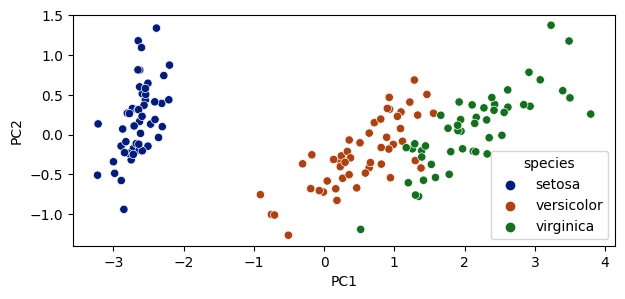

In [42]:
plt.figure(figsize=(7,3))
sns.scatterplot(data=X_red_pc, x='PC1', y='PC2', hue='species', palette='dark')

## Applying supervised learning without PCA

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=23)
svm = SVC(probability=True, kernel='linear', random_state=23)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_prob = svm.predict_proba(X_test)
print(f"acc -> {accuracy_score(y_test, y_pred)}")
print(f"log loss -> {log_loss(y_test, y_pred_prob)}")

acc -> 0.9555555555555556
log loss -> 0.12823960187955155


## Supervised learning with PCA

In [55]:
X_red_pc = comps[['PC1', 'PC2']]
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X_red_pc, y, test_size=0.3, random_state=23, stratify=y)
svm = SVC(probability=True, kernel='linear', random_state=23)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_prob = svm.predict_proba(X_test)
print(f"acc -> {accuracy_score(y_test, y_pred)}")
print(f"log loss -> {log_loss(y_test, y_pred_prob)}")

acc -> 0.9333333333333333
log loss -> 0.15674265488760733


In the above two cells we can see that supervised learning with PCA does not imporve the metrics of the model so we will try to apply scaling.

In [62]:
'''while scaling we always apply fit_transform on training data and we transform test dataset
    this is done to avoid the data leakage i.e information from test should not be used to train the data.
'''

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(probability=True, kernel='linear', random_state=23)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)
y_pred_prob = svm.predict_proba(X_test_scaled)
print(f"acc -> {accuracy_score(y_test, y_pred)}")
print(f"log loss -> {log_loss(y_test, y_pred_prob)}")

acc -> 0.9333333333333333
log loss -> 0.1463217932375708


## Bankruptcy Dataset

In [63]:
bank = pd.read_csv("/home/darkstar/Documents/pg-dbda/module5_R-Programming/practice/day1/Datasets/Bankruptcy.csv")
bank

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,1,77,0.27,0.03,0.07,0.10,0.09,0.18,0.26,...,0.11,0.06,0.12,0.17,7.56,2.07,1.45,0.06,0.13,0.19
128,129,1,77,0.32,0.03,0.03,0.09,0.05,0.06,0.16,...,0.17,0.07,0.09,0.26,5.99,1.27,2.74,0.06,0.08,0.21
129,130,1,78,0.08,0.01,0.02,0.05,0.04,0.07,0.15,...,0.19,0.07,0.12,0.26,7.14,1.89,2.10,0.07,0.12,0.26
130,131,1,78,0.14,0.01,0.05,0.07,0.02,0.09,0.14,...,0.07,0.02,0.10,0.15,170.96,4.55,1.45,0.02,0.10,0.14


In [130]:
X = bank.drop(['NO','YR','D'], axis = 1)
y = bank['D']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=23)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [131]:
pcomp = PCA()
comps = pcomp.fit_transform(X_train_scaled)

In [132]:
print(f"per variations: {pcomp.explained_variance_ratio_*100}")

per variations: [3.82876117e+01 1.26983640e+01 1.19326786e+01 8.83727952e+00
 7.37450494e+00 4.84461622e+00 4.03984548e+00 3.56005870e+00
 2.96225862e+00 1.90774160e+00 1.22925967e+00 1.01194361e+00
 4.86072941e-01 2.84189602e-01 1.79055496e-01 1.22917700e-01
 8.20785992e-02 5.56969128e-02 3.15846359e-02 2.55061287e-02
 2.23969468e-02 1.79728093e-02 4.65419684e-03 1.71134792e-03]


In [133]:
#comps = pd.DataFrame(comps[:, :8], columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
comps[:, :8]


array([[ 3.54668528e-01, -1.94339622e-01, -8.53581041e-01,
         1.49283409e+00, -6.44788556e-01,  3.66611917e-01,
         1.53629363e+00, -3.27805076e-01],
       [-1.35812628e+00, -1.17199478e-01,  7.96939501e-02,
        -4.88885395e-01,  1.34855359e+00, -6.41727432e-01,
        -1.93563193e-01,  9.21314227e-02],
       [-8.51502438e-01, -5.14818617e-01, -5.69625762e-01,
        -3.06876296e-03,  7.94396676e-01, -4.82550866e-01,
        -2.90116851e-01, -1.93656352e-01],
       [ 1.90975554e+00, -3.62344285e-01, -1.08251370e+00,
         1.50580027e-01, -7.91682949e-02, -5.74825598e-01,
        -1.63952435e-01, -7.41903793e-01],
       [ 8.87825042e-01, -1.32038535e+00, -7.94944472e-01,
         1.21770959e-02, -3.01259194e+00,  2.14139577e+00,
        -1.96104943e-01, -7.68510867e-01],
       [ 7.05271817e-01,  9.39405103e-02, -9.33267186e-01,
         3.22715816e+00, -8.32786858e-01,  9.97375003e-01,
         3.78229925e+00, -1.35360521e-01],
       [-2.55531239e+00,  1.875540

In [138]:
svm = SVC(probability=True, kernel='linear', random_state=23)
X_test_scaled_pc = pcomp.transform(X_test_scaled)
svm.fit(comps, y_train)
y_pred = svm.predict(X_test_scaled_pc)
y_pred_prob = svm.predict_proba(X_test_scaled_pc)
print(accuracy_score(y_test, y_pred))
print(log_loss(y_test, y_pred_prob))

0.725
0.5518845095081535
